# Terza esercitazione

Basandoci sulla teoria di Black-Scholes secondo cui l'evoluzione del prezzo di un bene è stocastica e segue un moto Browniano geometrico con tasso di interesse privo di rischio costante $r$ e volatilità $\sigma$, andiamo a calcolare con un metodo Monte Carlo il prezzo della European call-option $C[S(0),0]$ al tempo $t=0$ e della European put-option $P[S(0),0]$ sempre al tempo $t=0$.

Dato il prezzo di un bene $S$ che segue un moto Browniano geometrico e con valore iniziale $S(0)$, allora
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    con $W(t)\sim\mathcal{N}(0,t)$ distribuito normalmente.
    
Le stime della call-option price e della put-option price avvengono sfruttando il data-blocking come sempre.

**Soluzione analitica**

In [1]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


**Soluzione con campionamento diretto del prezzo finale**

In questo caso andiamo a campionare direttamente $S(T)$ con i seguenti parametri:

- prezzo del bene a $t=0$: $S(0)=100$
- tempo di consegna: $T=1$
- prezzo d'esercizio: $K=100$
- tasso d'interesse a zero richi: $r=0.1$
- volatilità: $\sigma=0.25$
- numero lanci totali: $10000$
- numero blocchi: $100$

$C(0)=exp(-rT)max(0,S-K)$

$P(0)=exp(-rT)max(0,K-S)$

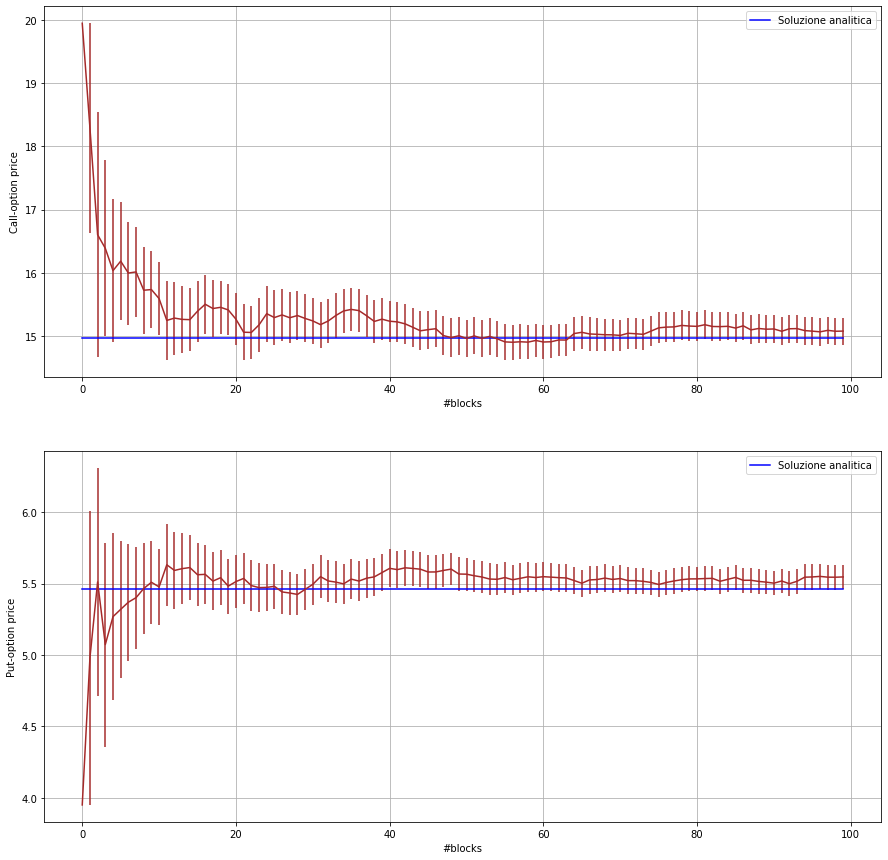

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
 
N=100                         
x = np.arange(N) 
y=[call]*N
z=[put]*N

sumcall, errcall, sumput, errput = np.loadtxt("direct.txt", usecols=(0,1,2,3), delimiter=' ', unpack='true')
fig, (a,b) = plt.subplots(2)

fig.set_figheight(15)
fig.set_figwidth(15)

a.plot(x,y,label='Soluzione analitica',color="blue")
a.errorbar(x,sumcall,yerr=errcall,color="brown")
a.set_xlabel('#blocks')
a.set_ylabel('Call-option price')
a.legend()

a.grid(True)


b.plot(x,z,label='Soluzione analitica',color="blue")
b.errorbar(x,sumput,yerr=errput, color="brown")
b.set_xlabel('#blocks')
b.set_ylabel('Put-option price')
b.legend()
b.grid(True)


plt.show()

**Soluzione con campionamento discretizzato**

Qui invece $S$ viene determinato ricorsivamente dividendo l'intervallo $[0,T]$ in 100 sub-intervalli e applicando la seguente formula con gli stessi parametri utilizzati nel campionamento diretto

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    con $Z_i \sim \mathcal{N}(0,1)$

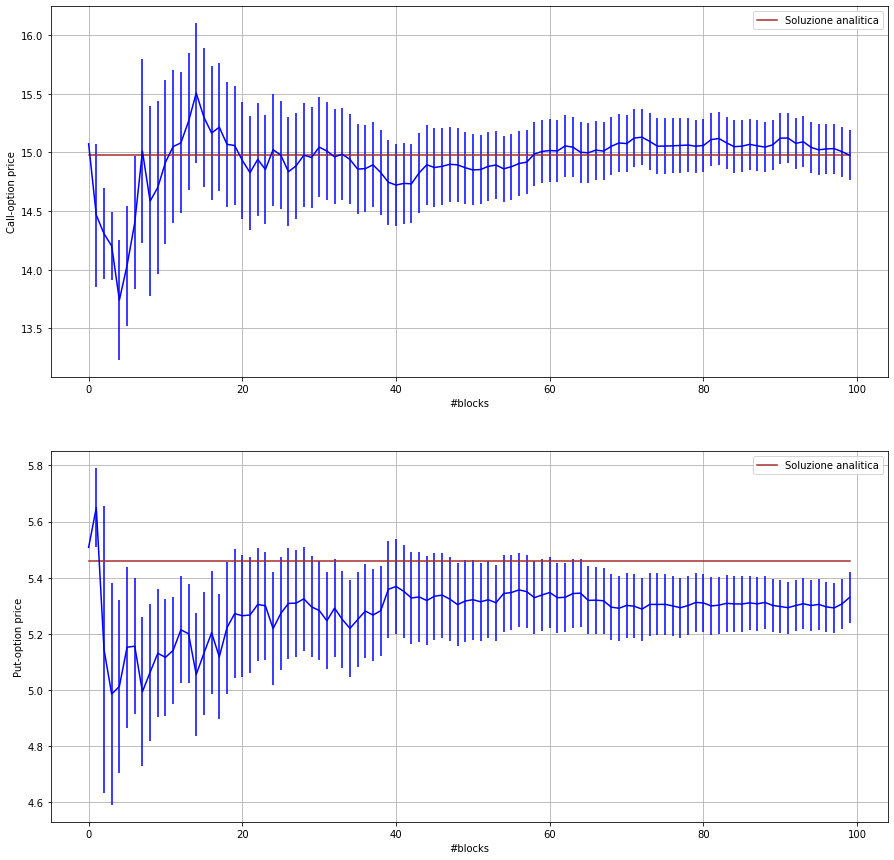

In [27]:
sumcall, errcall, sumput, errput = np.loadtxt("sampled.txt", usecols=(0,1,2,3), delimiter=' ', unpack='true')

fig, (a,b) = plt.subplots(2)

fig.set_figheight(15)
fig.set_figwidth(15)

a.plot()
b.plot()

a.errorbar(x,sumcall,yerr=errcall,color="blue")
b.errorbar(x,sumput,yerr=errput, color="blue")

a.set_xlabel('#blocks')
a.set_ylabel('Call-option price')

b.set_xlabel('#blocks')
b.set_ylabel('Put-option price')

a.grid(True)
b.grid(True)

a.legend()
b.legend()

plt.show()